In [1]:
import tweepy
from tweepy import OAuthHandler
from collections import Counter
from datetime import date
from tweepy import Cursor
import datetime
import pandas as pd 
import csv
import json
import os
import matplotlib.pyplot as plt

In [2]:
#Variables that contains the user credentials to access Twitter API
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

## Data Collection

In [39]:
#Followers Growth for 2 weeks
frame = pd.DataFrame(columns = ['Date', 'Follower'])
frame.to_csv('follower.csv')

In [3]:
from csv import writer

def append_list_as_row(file_name, list_of_elem):
    
    with open(file_name, 'a+', newline='') as write_obj:
        csv_writer = writer(write_obj)
        csv_writer.writerow(list_of_elem)

username = api.get_user('UnderArmour')
today = date.today()
print("Today's date:", today)
follower_count = username.followers_count
print("Follower count:", follower_count)
row_contents = ['0', today, follower_count]
append_list_as_row('follower.csv', row_contents)

Today's date: 2021-02-08
Follower count: 950845


In [67]:
#Data for 1 year
def getUserTimelineOneYear(screen_name):
    startDate = datetime.datetime(2020, 1, 1)
    endDate =   datetime.datetime(2021, 1, 1)
    dirname = '/output/'
    os.makedirs(dirname, mode=0o755, exist_ok=True)
    fname = "output/user_timeline_{}_between_2020-2021.json".format(screen_name)
    print("Collecting home timeline statuses for", screen_name)
    count = 0
    with open(fname, 'w') as f:
        for page in Cursor(api.user_timeline, screen_name=screen_name, count=200).pages(20):
            for status in page:     
                if status.created_at > startDate and status.created_at < endDate:
                    f.write(json.dumps(status._json)+"\n")
                    count+=1
    print("Total Tweets Collected : ",count)
    print("Tweets Collected Succesfully")
    
getUserTimelineOneYear('UnderArmour')

Total Tweets Collected :  129
Tweets Collected Succesfully


# Metrics

## Followers Growth 

In [3]:
df = pd.read_csv('follower.csv')

In [4]:
df['Difference'] = df['Follower'].diff()
df = df.fillna(0)
df = df.drop(columns=['Unnamed: 0'])

In [5]:
df

,Date,Follower,Difference
0,2021-01-26,950947,0.0
1,2021-01-27,950906,-41.0
2,2021-01-28,950864,-42.0
3,2021-01-29,950837,-27.0
4,2021-01-30,950844,7.0
5,2021-01-31,950850,6.0
6,2021-02-01,950843,-7.0
7,2021-02-02,950817,-26.0
8,2021-02-03,950793,-24.0
9,2021-02-04,950781,-12.0


## Average Tweet Performance (Statistics)

In [95]:
#This is to get the January Text from the Adidas "User Timeline" and to conduct the analysis.
#This is used to downloaded dataset from the tweets collect functions
#Not the HOME TIMELINE OF ADIDAS!!
def getUserTimelineTweetPerformance(screen_name):
    #file = 'output/user_timeline_{}_between_1JanTo1Feb.json'.format(screen_name)
    file = 'output/user_timeline_{}_between_2020-2021.json'.format(screen_name)
    dic = {"date":[],"favorite_count":[], "retweet_count":[]}
    count=0
    with open(file) as f:
        for line in f:
            tweet = json.loads(line)
            favCount = tweet['favorite_count']
            retCount = tweet['retweet_count']
            d = tweet['created_at'].split(' ')
            dic['date'].append(d)
            dic['favorite_count'].append(favCount)
            dic['retweet_count'].append(retCount)
            count += 1

    user = api.get_user(screen_name)
    followersCount = user.followers_count
    #print("Followers Count : ",followersCount)
    dfDaily = pd.DataFrame(dic)
    print("Statuses Count : ",count)
    favouritesCount = dfDaily['favorite_count'].sum()
    print("Favourites Count : ",favouritesCount)
    retweetsCount = sum(dfDaily['retweet_count'])
    print("Retweets Count : ",retweetsCount)
    avgFavouritesCount = round(favouritesCount / count, 4)
    print("Average Favourite Count : ",avgFavouritesCount)
    avgRetweetsCount = round(retweetsCount / count, 4)
    print("Average Tweets Count : ",avgRetweetsCount)

    favoritPerUser = round(favouritesCount / followersCount, 4)
    retweetPerUser = round(retweetsCount / followersCount, 4)

    print("\n----- Statistic {} based on Favourties and Retweets -----".format(screen_name))
    print("Total {} followers".format(followersCount))
    print("Favourited {} times ({} per tweet, {} per user)".format(favouritesCount, avgFavouritesCount, favoritPerUser))
    print("Retweeted {} times ({} per tweet, {} per user)".format(retweetsCount, avgRetweetsCount, retweetPerUser))
    
    #return pd.DataFrame(dic)
getUserTimelineTweetPerformance("UnderArmour")

Statuses Count :  129
Favourites Count :  24172
Retweets Count :  27411
Average Favourite Count :  187.3798
Average Tweets Count :  212.4884

----- Statistic UnderArmour based on Favourties and Retweets -----
Total 950844 followers
Favourited 24172 times (187.3798 per tweet, 0.0254 per user)
Retweeted 27411 times (212.4884 per tweet, 0.0288 per user)


## Hashtags Based on User_Timeline 

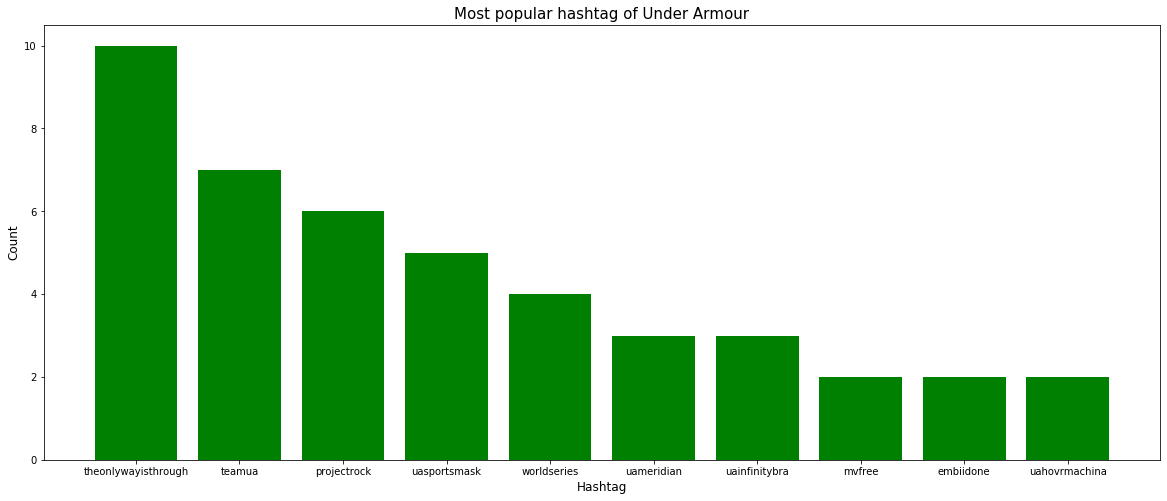

In [100]:
def get_hashtags(tweet):
    entities = tweet.get('entities', {})
    hashtags = entities.get('hashtags', [])
    return [tag['text'].lower() for tag in hashtags]

t = []
co = []
    
    
def getHashes(screen_name):
    if __name__ == '__main__':    
        #Jan-Feb Data
        #fname = "output/user_timeline_{}_between_1JanTo1Feb.json".format(screen_name)
        #fname = "output/user_home_timeline_{}_between_1JanTo1Feb.json".format(screen_name)
        #One year Data 
        fname = "output/user_timeline_{}_between_2020-2021.json".format(screen_name)
        with open(fname, 'r') as f:
            hashtags = Counter()
            for line in f:
                tweet = json.loads(line)
                hashtags_in_tweet = get_hashtags(tweet)
                hashtags.update(hashtags_in_tweet)
            for tag, count in hashtags.most_common(10):
                t.append(tag)
                co.append(count)
                #print("{}: {}".format(tag, count))
                
        d = {'Hashtag': t, 'Count': co}
        df = pd.DataFrame(data = d)
        plt.figure(figsize=(20,8)) 
        plt.bar(df['Hashtag'], df['Count'], label = "Hashtag", color = 'green')
        plt.xlabel('Hashtag', fontsize = 12)
        plt.ylabel('Count', fontsize = 12)
        plt.title('Most popular hashtag of Under Armour', fontsize = 15)
        plt.xticks(rotation = 'horizontal')
        
getHashes('UnderArmour')

## Mentions Based on User_Timeline

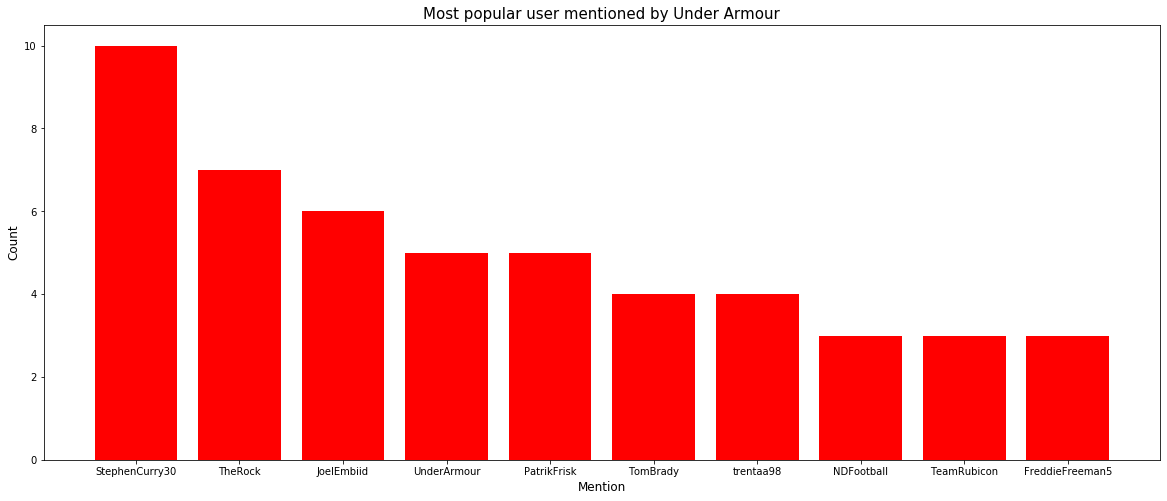

In [101]:
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    mentions = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in mentions]

us = []
co = []

def getMentiones(screen_name):
    if __name__ == '__main__':
        #fname = "output/user_timeline_{}_between_1JanTo1Feb.json".format(screen_name)
        #fname = "output/user_home_timeline_{}_between_1JanTo1Feb.json".format(screen_name)
        #One year data 
        fname = "output/user_timeline_{}_between_2020-2021.json".format(screen_name)

        with open(fname, 'r') as f:
            users = Counter()
            for line in f:
                tweet = json.loads(line)
                mentions_in_tweet = get_mentions(tweet)
                users.update(mentions_in_tweet)
            for user, count in users.most_common(10):
                us.append(user)
                co.append(count)
                #print("{}: {}".format(user, count))
                
    d = {'Mention': us, 'Count': co}
    df = pd.DataFrame(data = d)
    plt.figure(figsize=(20,8)) 
    plt.bar(df['Mention'], df['Count'], label = "Mention", color = 'red')
    plt.xlabel('Mention', fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    plt.title('Most popular user mentioned by Under Armour', fontsize = 15)
    plt.xticks(rotation = 'horizontal')

getMentiones("UnderArmour")

## Top Influencer (Based on who @ the particular brands the most ?)

In [78]:
def getquery(searchQuery,date = '2021-01-25'):
  dirname = '/output/'
  os.makedirs(dirname, mode=0o755, exist_ok=True)
  counter=0
  with open(dirname + 'searchQuery_'+searchQuery+'_before'+'_'+date+'.json','w') as f:
    for page in Cursor(api.search,q = searchQuery, until = date,count=200).pages(10):
      for status in page:
        f.write(json.dumps(status._json)+"\n")
        counter+=1
  print("Total %d searchQuery Tweets collected" % counter)

for i in range(25,31):
  date = '2021-01-'+str(i)
  print(date)
  getquery("UnderArmour",date=date)

2021-02-8
Total 921 searchQuery Tweets collected


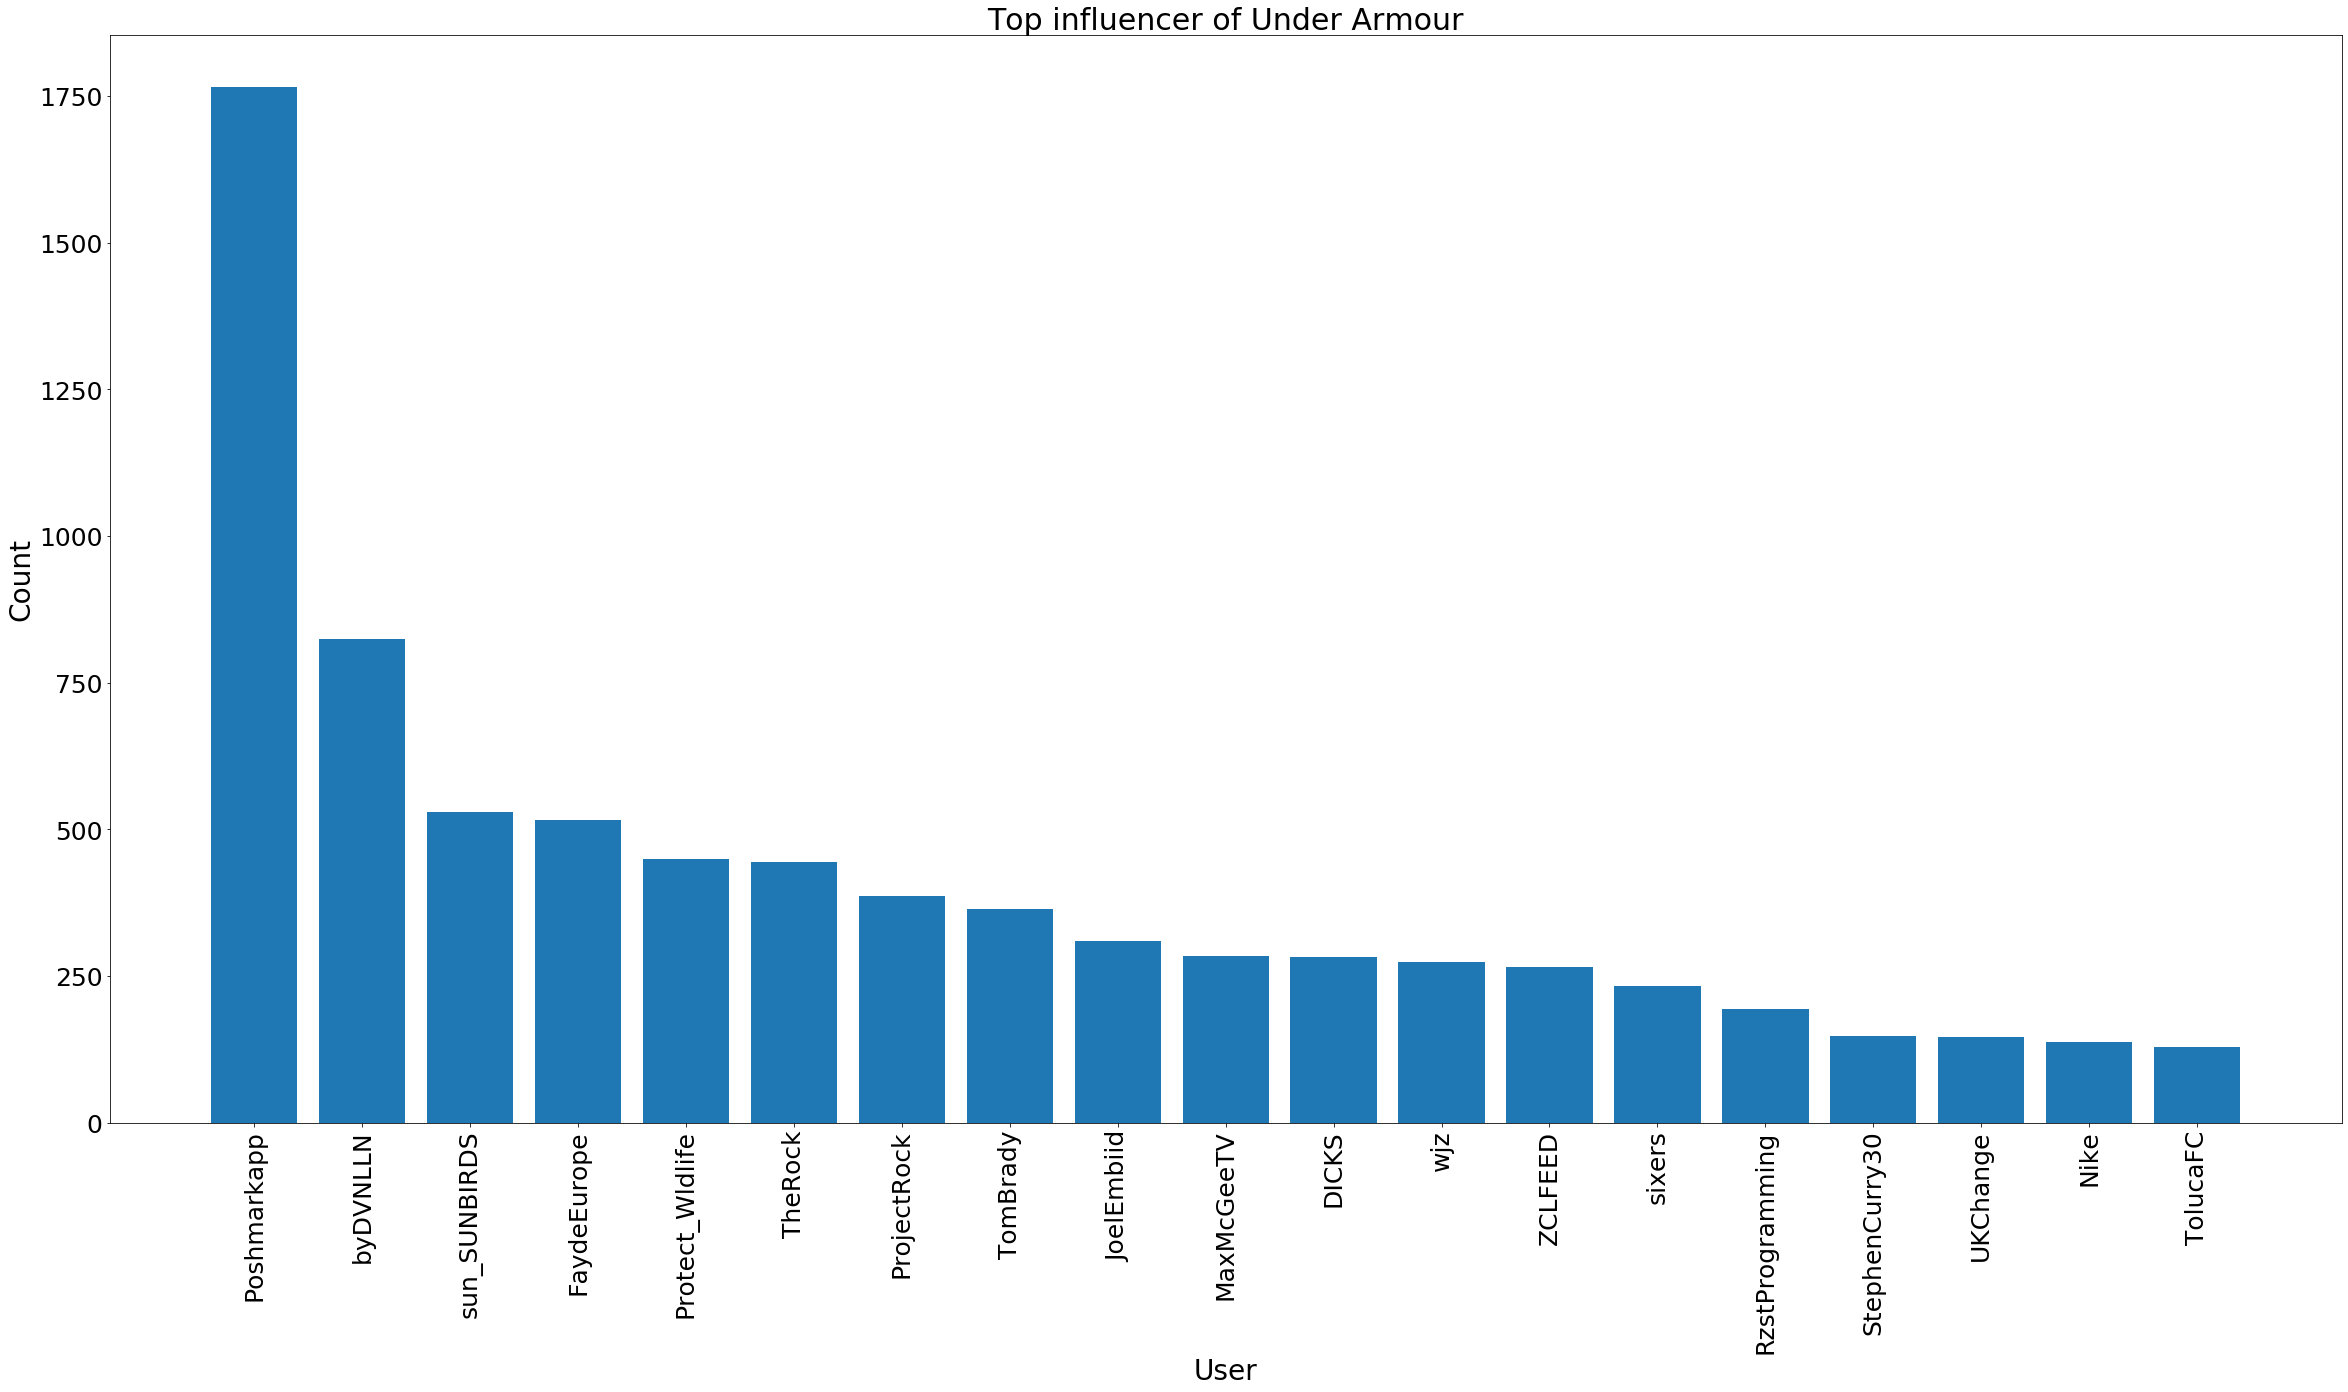

In [19]:
def get_mentions(tweet):
    entities = tweet.get('entities', {})
    mentions = entities.get('user_mentions', [])
    return [tag['screen_name'] for tag in mentions]

us = []
co = []

def getMentiones(screen_name):
    if __name__ == '__main__':
        #for i in range(18,25):
        #fname = fdir + 'searchQuery_mgag_before'+'_'+date+'.json'
        fname = "output/searchQuery_UnderArmour.json"
        with open(fname, 'r') as f:
            users = Counter()
            for line in f:
                tweet = json.loads(line)
                mentions_in_tweet = get_mentions(tweet)
                users.update(mentions_in_tweet)
            for user, count in users.most_common(20):
                us.append(user)
                co.append(count)
                #print("{}: {}".format(user, count))
    
        d = {'User': us, 'Count': co}
        df = pd.DataFrame(data = d)
        df = df.drop(df.index[0])
        plt.figure(figsize=(40,20)) 
        plt.bar(df['User'], df['Count'], label = "Mentions")
        plt.xlabel('User', fontsize = 28)
        plt.ylabel('Count', fontsize = 28)
        plt.title('Top influencer of Under Armour', fontsize = 30)
        plt.xticks(rotation = 'vertical', fontsize = 25)
        plt.yticks(fontsize = 25)

getMentiones("UnderArmour")

## Most Active Time

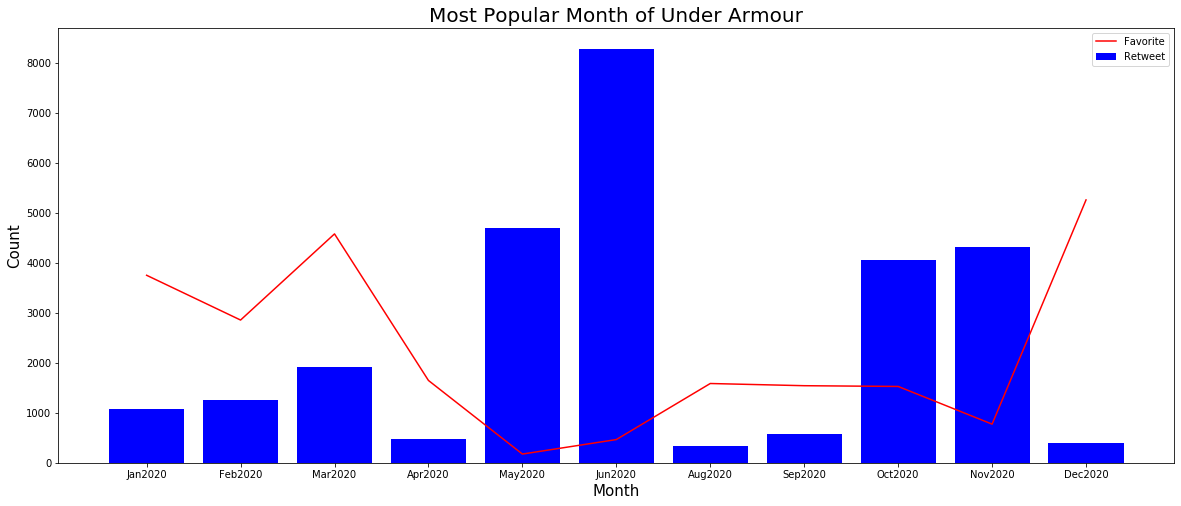

In [89]:
def getActiveHomeTimeLine(period, screen_name):
    #One month data
    #file = 'output/user_home_timeline_{}_between_1JanTo1Feb.json'.format(screen_name)
    #file = 'output/user_timeline_{}_between_1JanTo1Feb.json'.format(screen_name)
    #One year data 
    file = 'output/user_timeline_{}_between_2020-2021.json'.format(screen_name)
    dic = {"date":[],"favorite_count":[], "retweet_count":[]}
    with open(file) as f:
        for line in f:
            tweet = json.loads(line)
            favCount = tweet['favorite_count']
            retCount = tweet['retweet_count']
            d = tweet['created_at'].split(' ')
            #print(d)
            if period=='daily':
                d = d[2]+d[1]+d[5]
            elif period=='monthly':
                d = d[1]+d[5]
            elif period=='yearly':
                d = d[5]
            if d not in dic['date']:
                dic['date'].append(d)
                dic['favorite_count'].append(favCount)
                dic['retweet_count'].append(retCount)
            else:
                idx = dic['date'].index(d)
                dic['favorite_count'][idx] += favCount
                dic['retweet_count'][idx] += retCount
                
    df = pd.DataFrame(dic)
    df = df.iloc[::-1]
    plt.figure(figsize=(20,8)) 
    plt.plot(df['date'], df['favorite_count'], label = "Favorite", color = 'red')
    plt.bar(df['date'], df['retweet_count'], label = "Retweet", color = 'blue')
    plt.legend()
    plt.xlabel('Month', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    plt.title('Most Popular Month of Under Armour', fontsize = 20)
    plt.xticks(rotation = 'horizontal')

getActiveHomeTimeLine('monthly',"UnderArmour")